In [4]:
!pip install pyreadstat

Active code page: 1252


In [8]:
import pyreadstat

In [9]:
df, meta = pyreadstat.read_sav('Birthweight_reduced_kg_SPSS.sav') 
#meta is the way of giving data to the dataframe through pyreadstat

In [10]:
df.head()

,ID,Headcirc,Length,Birthweight,Gestation,mage,smoker,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,mnocig
0,1360.0,34.0,56.0,4.55,44.0,20.0,0.0,162.0,57.0,23.0,10.0,35.0,179.0,0.0,0.0,0.0
1,1016.0,36.0,53.0,4.32,40.0,19.0,0.0,171.0,62.0,19.0,12.0,0.0,183.0,0.0,0.0,0.0
2,462.0,39.0,58.0,4.10,41.0,35.0,0.0,172.0,58.0,31.0,16.0,25.0,185.0,0.0,1.0,0.0
3,1187.0,38.0,53.0,4.07,44.0,20.0,0.0,174.0,68.0,26.0,14.0,25.0,189.0,0.0,0.0,0.0
4,553.0,37.0,54.0,3.94,42.0,24.0,0.0,175.0,66.0,30.0,12.0,0.0,184.0,0.0,0.0,0.0


### Q1. What is the mean father’s age?

round(df['fage'].mean(),2)

### Q2. What is the mean father’s age for low birthweight babies?

In [23]:
low_birthweight=df['Birthweight'].mean()
low_birthweight

3.3128571428571427

In [27]:
fage_for_lbw_babies=df.loc[df['Birthweight'] < low_birthweight, 'fage'].mean()
round(fage_for_lbw_babies,2)

27.71

### Q3. Is the father's age normally distributed? Justify your answer.

In [28]:
from matplotlib import pyplot

(array([ 6.,  9.,  5.,  1., 11.,  1.,  3.,  4.,  1.,  1.]),
 array([19. , 21.7, 24.4, 27.1, 29.8, 32.5, 35.2, 37.9, 40.6, 43.3, 46. ]),
 <BarContainer object of 10 artists>)

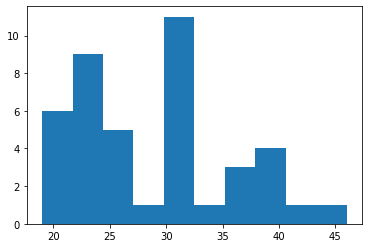

In [31]:
pyplot.hist(df['fage'])

In [35]:
#we want to do the shapiro wilk test

from scipy.stats import shapiro
stat, p = shapiro(df['fage'])

print('statistics=%.3f, p=%.3f' % (stat, p))

if p> 0.05:
    print ('normally distributed')
else:
    print('column is not normally distributed')



statistics=0.944, p=0.038
column is not normally distributed


### Q4. If you apply the log transformation to the father's age, what is the mean score of the transformed variable?

(array([ 5.,  2.,  8.,  5.,  1., 11.,  1.,  5.,  3.,  1.]),
 array([2.94443898, 3.03285922, 3.12127946, 3.2096997 , 3.29811995,
        3.38654019, 3.47496043, 3.56338067, 3.65180091, 3.74022115,
        3.8286414 ]),
 <BarContainer object of 10 artists>)

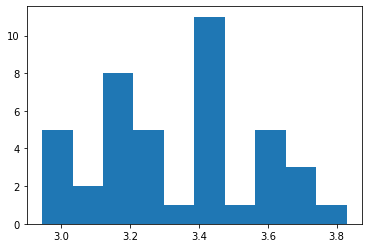

In [42]:
import numpy as np
data_log=np.log(df['fage'])
pyplot.hist(data_log)

In [44]:
data_log.mean()

3.3370421189026085

###Q5. Is the above mean score a good representation of the real value? Justify your answer.


The log-transformation is widely used in biomedical and psychosocial research to deal with skewed data. This paper highlights serious problems in this classic approach for dealing with skewed data. Despite the common belief that the log transformation can decrease the variability of data and make data conform more closely to the normal distribution, this is usually not the case. Moreover, the results of standard statistical tests performed on log-transformed data are often not relevant for the original, non-transformed data.We demonstrate these problems by presenting examples that use simulated data. We conclude that if used at all, data transformations must be applied very cautiously. We recommend that in most circumstances researchers abandon these traditional methods of dealing with skewed data and, instead, use newer analytic methods that are not dependent on the distribution the data, such as generalized estimating equations (GEE).
--dr Chenngyong Feng


### Q6. Is the new variable (log transform of father’s age) normally distributed? Justify your answer.

In [47]:
from scipy.stats import shapiro
shapiro(data_log)

ShapiroResult(statistic=0.9583315253257751, pvalue=0.12867699563503265)

yes, p value is above 0.05, so its normally distributed now

### Q7. Is the variable “years father was in education” normally distributed? 

In [105]:
from scipy.stats import shapiro
stat, p=shapiro(df['fedyrs'])
p


4.483600059757009e-05

(array([ 6.,  0.,  0., 10.,  0.,  0., 11.,  0.,  0., 15.]),
 array([10. , 10.6, 11.2, 11.8, 12.4, 13. , 13.6, 14.2, 14.8, 15.4, 16. ]),
 <BarContainer object of 10 artists>)

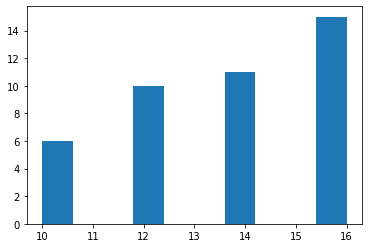

In [56]:
pyplot.hist(df['fedyrs'])

No, not normally distributed

Our distribution was not normally distributed.  Our p value is less than 0.05. Therefore, we reject the null hypothesis which was that the dataset is statistically significant. 

### Q9. What is the mean score for the variable “years father was in education” after you apply the Box-Cox transformation?

In [141]:
from scipy import stats
fitted_data, fitted_lambda =stats.boxcox(df['fedyrs'])
fitted_data.mean()
df['fitted_data']=fitted_data


In [134]:
stat, p = shapiro(fitted_data)

In [147]:
print(f'{p} which is equivalent of 620.8209995')

4.183058990747668e-05 which is equivalent of 620.8209995


In [142]:
df.columns

Index(['ID', 'Headcirc', 'Length', 'Birthweight', 'Gestation', 'mage',
       'smoker', 'mheight', 'mppwt', 'fage', 'fedyrs', 'fnocig', 'fheight',
       'lowbwt', 'mage35', 'mnocig', 'fitted_data'],
      dtype='object')

### Q11. What is the mean score for this new variable (B-C transformed fathers’ years in education) for mothers aged under 35?

In [143]:
df.loc[df['mage'] < 35, 'fitted_data'].mean()

153.18044640735926